In [67]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sanity check

This file is to conduct basic sanity check on the data process.

# Check daily results

Import result file that has the daily record of results.

In [68]:
results = pd.read_csv('/net/lazer/lab-lazer/shared_projects/google_audit_reproduce/intermedidate_files/merged_summary/day_qry_loc.csv')

In [69]:
results

,crawl_id,qry,loc_id,counts
0,20200901,Abby Finkenauer,"AK-AT LARGE,Alaska,United States",6
1,20200901,Abby Finkenauer,"AL-1,Alabama,United States",17
2,20200901,Abby Finkenauer,"AL-2,Alabama,United States",18
3,20200901,Abby Finkenauer,"AL-3,Alabama,United States",17
4,20200901,Abby Finkenauer,"AL-4,Alabama,United States",18
...,...,...,...,...
19943483,20201231,Zoe Lofgren,"WI-8,Wisconsin,United States",12
19943484,20201231,Zoe Lofgren,"WV-1,West Virginia,United States",12
19943485,20201231,Zoe Lofgren,"WV-2,West Virginia,United States",12
19943486,20201231,Zoe Lofgren,"WV-3,West Virginia,United States",12


# Number of qry

The number of unique names of U.S. representatives members used as queries that are included in the final analysis.

In [70]:
qry_counts = results.groupby(['qry'], dropna=True, as_index=False)['counts'].sum()

In [71]:
len(qry_counts)

417

# Total results

The total number of urls (i.e. results) in the search results.

In [72]:
results['counts'].sum()

299573378

# Number of days

The number of days that searches are successful.

In [73]:
day_counts = results.groupby(['crawl_id'], dropna=True, as_index=False)['counts'].sum()

In [74]:
day_counts['date']= pd.to_datetime(day_counts['crawl_id'], format='%Y%m%d')

In [75]:
day_counts = day_counts.sort_values('date', ascending=True)

In [76]:
len(day_counts)

112

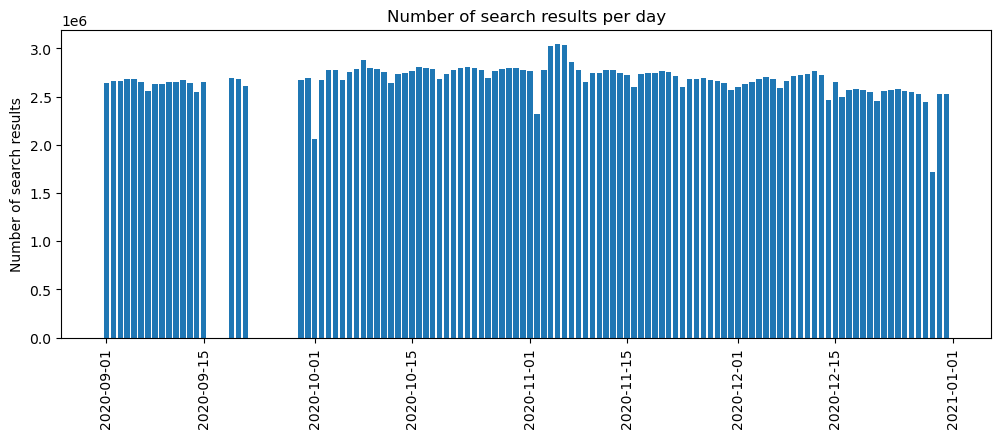

In [77]:
fig = plt.figure(figsize = (12, 4))

plt.bar(day_counts['date'], day_counts['counts'])
plt.xticks(rotation='vertical')

plt.ylabel("Number of search results")
plt.title("Number of search results per day")
plt.savefig("../data/plots/num_results_by_day.png", bbox_inches='tight', dpi=200) 
plt.show()

## Daily resutls

Average number of results per qry per location for a day.

In [78]:
avg_num_result_per_page = results['counts'].mean()

In [79]:
avg_num_result_per_page

15.021112555637208

# Get non-processed dates

Get the missing dates that are not in the data due to techniqual issue on these days.

In [80]:
from datetime import date, timedelta

sdate = date(2020,9,1)   # start date
edate = date(2020,12,31)   # end date

In [81]:
natural_dates = pd.date_range(sdate,edate-timedelta(days=1),freq='d').strftime('%Y%m%d').tolist()

In [82]:
dates_in_data = day_counts['crawl_id'].astype("string").unique().tolist()

In [83]:
missing_dates = set(natural_dates) - set(dates_in_data)

In [84]:
len(missing_dates)

10

In [85]:
missing_dates

{'20200916',
 '20200917',
 '20200918',
 '20200922',
 '20200923',
 '20200924',
 '20200925',
 '20200926',
 '20200927',
 '20200928'}

# Check daily location

check the number of locations that searches are successfully simulated from for each day. It is supposed to be 435 congressional districts and 1 general serach.

In [43]:
loc_counts = results.groupby(['crawl_id', 'qry'], dropna=True, as_index=False)['loc_id'].count()

In [44]:
loc_counts

,crawl_id,qry,loc_id
0,20200901,Abby Finkenauer,436
1,20200901,Abigail Spanberger,436
2,20200901,Adam Kinzinger,436
3,20200901,Adam Schiff,436
4,20200901,Adam Smith,436
...,...,...,...
46428,20201231,Will Hurd,401
46429,20201231,William Timmons,404
46430,20201231,Xochitl Torres Small,414
46431,20201231,Yvette Clarke,401


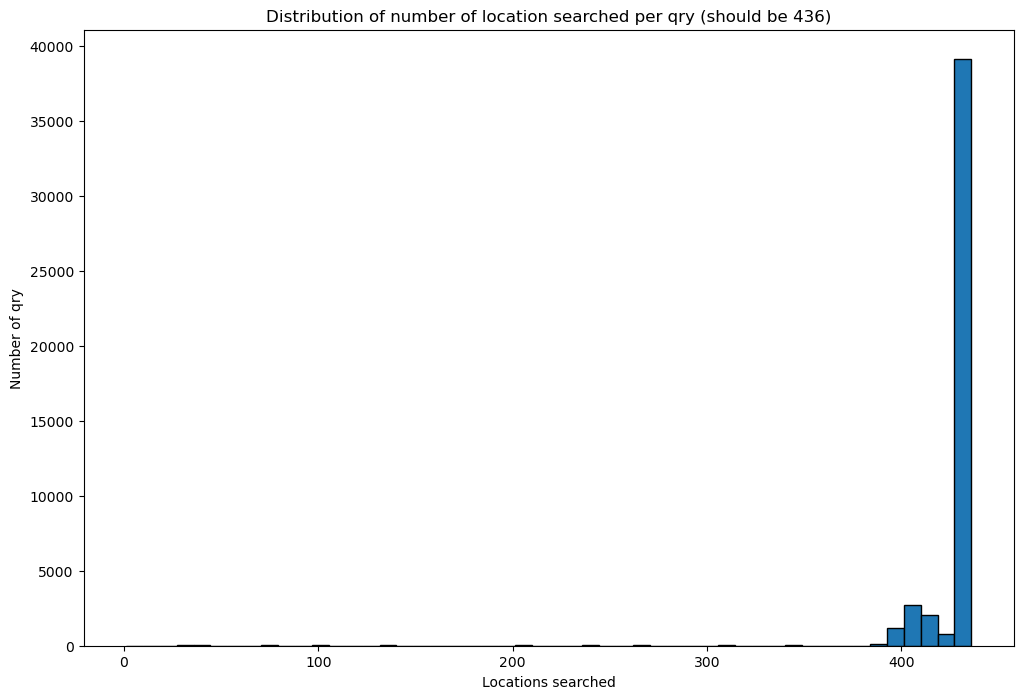

In [47]:
fig = plt.figure(figsize = (12, 8))

plt.hist(loc_counts['loc_id'], edgecolor='black', bins=50)
# plt.xticks(rotation='vertical')
 
plt.xlabel("Locations searched")
plt.ylabel("Number of qry")
plt.title("Distribution of number of location searched per qry (should be 436)")
plt.savefig("../data/plots/loc_counts_distribution.png", bbox_inches='tight', dpi=200) 
plt.show()